# AdaBoost(Adaptive Boosting)

In [1]:
# we learened
# dec varience 
# used for overfit models
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# now learn
# dec bias
# used for underfit models
# week models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

- Boosting: Ensemble method combining `several weak learners` to form a `strong learner`.
- Train an ensemble of predictors `sequentially`.
- Each predictor tries to correct its predecessor.
- Most popular boosting methods:
    1. AdaBoost
    2. Gradient Boosting.
    ![bb](https://github.com/rritec/datahexa/blob/dev/images/ds000017.png?raw=true)

# AdaBoost
- Stands for `Ada`ptive `Boost`ing.
- Each predictor pays more attention to the instances wrongly predicted by its predecessor.
- Achieved by changing the weights of training instances.
- Each predictor is assigned a coefficient α.
- α depends on the predictor's training error.

# AdaBoost: Training
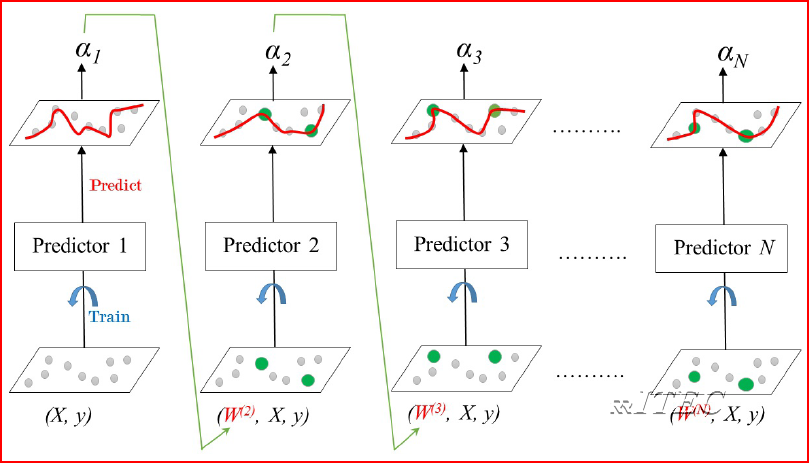

# Learning Rate
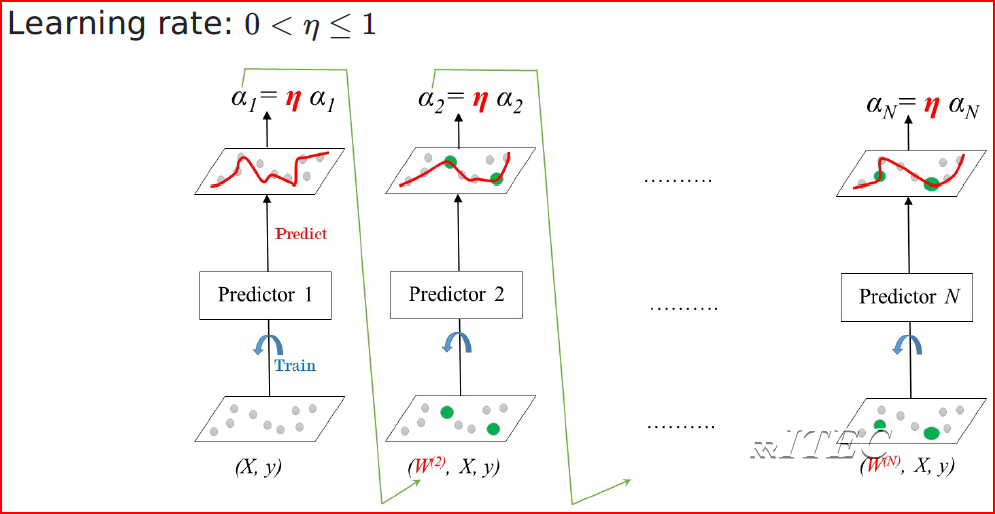

- AdaBoost: Prediction
    - Classification:
        - Weighted majority voting.
        - In sklearn: AdaBoostClassifier.
    - Regression:
        - Weighted average.
        - In sklearn: AdaBoostRegressor.

### `more detail explanation`

How does the AdaBoost algorithm work?
1. Initially, Adaboost selects a training subset randomly.
2. It iteratively trains the AdaBoost machine learning model by selecting the training set based on the accurate prediction of the last training.
3. It assigns the higher weight to wrong classified observations so that in the next iteration these observations will get the high probability for classification.
4. Also, It assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight.
5. This process iterate until the complete training data fits without any error or until reached to the specified maximum number of estimators.
6. To classify, perform a "vote" across all of the learning algorithms you built.
![bb](https://github.com/rritec/datahexa/blob/dev/images/ds000018.png?raw=true)

[Refer Adaboost Maths Here](https://towardsdatascience.com/adaboost-for-dummies-breaking-down-the-math-and-its-equations-into-simple-terms-87f439757dcf)

https://sefiks.com/2018/11/02/a-step-by-step-adaboost-example/

https://www.csd.uwo.ca/courses/CS4442b/L5-ML-Boosting.pdf

## Exercise 1: Using Iris Data

In [1]:
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [2]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=21) # 70% training and 30% test

In [4]:
AdaBoostClassifier?

Init signature:
AdaBoostClassifier(
    base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None,
)
Docstring:     
An AdaBoost classifier.

An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
classifier on the original dataset and then fits additional copies of the
classifier on the same dataset but where the weights of incorrectly
classified instances are adjusted such that subsequent classifiers focus
more on difficult cases.

This class implements the algorithm known as AdaBoost-SAMME [2].

Read more in the :ref:`User Guide <adaboost>`.

Parameters
----------
base_estimator : object, optional (default=None)
    The base estimator from which the boosted ensemble is built.
    Support for sample weighting is required, as well as proper
    ``classes_`` and ``n_classes_`` attributes. If ``None``, then
    the base estimator is ``DecisionTreeClassifier(max_depth=1)``

n_estimators : integer, optional (default=50

In [6]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,                     
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [8]:
model.estimator_weights_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
model.classes_

array([0, 1, 2])

In [10]:
model.feature_importances_

array([0.  , 0.  , 0.52, 0.48])

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
model.estimator_errors_

array([3.23809524e-01, 2.85738647e-02, 3.33333333e-01, 3.33333329e-01,
       2.42442668e-06, 3.33333264e-01, 2.71405584e-06, 3.33333305e-01,
       2.53038024e-06, 3.33333295e-01, 2.57452456e-06, 3.33333299e-01,
       2.55832759e-06, 3.33333298e-01, 2.56354898e-06, 3.33333298e-01,
       2.56178929e-06, 3.33333298e-01, 2.56237370e-06, 3.33333298e-01,
       2.56217866e-06, 3.33333298e-01, 2.56224364e-06, 3.33333298e-01,
       2.56222198e-06, 3.33333298e-01, 2.56222920e-06, 3.33333298e-01,
       2.56222679e-06, 3.33333298e-01, 2.56222759e-06, 3.33333298e-01,
       2.56222733e-06, 3.33333298e-01, 2.56222742e-06, 3.33333298e-01,
       2.56222739e-06, 3.33333298e-01, 2.56222740e-06, 3.33333298e-01,
       2.56222739e-06, 3.33333298e-01, 2.56222739e-06, 3.33333298e-01,
       2.56222739e-06, 3.33333298e-01, 2.56222739e-06, 3.33333298e-01,
       2.56222739e-06, 3.33333298e-01])

# apply AdaBoostClassifier with svc 

In [52]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model2 = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model2.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


### Exercise 2 : Use AdaBoost classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

[Read dataset](https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset)

## Step 1: Import required modules

In [12]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

## Step 2: Import Data

In [13]:
#os.chdir("C:\\Users\\Hi\\Google Drive\\01 Data Science Lab Copy\\02 Lab Data\\Python")
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")
df['gender'] = np.where(df['gender'] == 'Female', 1, 2)
df.info()
data = df.values
#Dropped na values
data = data[~np.isnan(data).any(axis=1)].copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age                 583 non-null int64
gender              583 non-null int32
tot_bilirubin       583 non-null float64
direct_bilirubin    583 non-null float64
tot_proteins        583 non-null int64
albumin             583 non-null int64
ag_ratio            583 non-null int64
sgpt                583 non-null float64
sgot                583 non-null float64
alkphos             579 non-null float64
is_patient          583 non-null int64
dtypes: float64(5), int32(1), int64(5)
memory usage: 47.9 KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


## Step 3: Split Data

In [14]:
# Set seed for reproducibility
SEED=1
# Splitting data into train and test data
X, y = data[:,:-1], data[:,-1]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
print("train martix:{} \ntest matrix {}".format(X_train.shape, X_test.shape))

train martix:(405, 10) 
test matrix (174, 10)


In [15]:
type(y)

numpy.ndarray

## Step 4: Fit dt and ada classifiers 

In [32]:
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)


In [39]:
# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1,learning_rate=1)
# Fit ada to the training set
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
          learning_rate=1, n_estimators=180, random_state=1)

## Step 5 : predict 

In [40]:
y_pred_ada= ada.predict(X_test)

In [41]:
acc_ada = accuracy_score(y_test, y_pred_ada)
# Print acc
print('acc score of ada: {:.2f}'.format(acc_ada))

acc score of ada: 0.70
